In [2]:
from nldg.utils import *
from nldg.gam import MaxRMLinearGAM
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

In [3]:
dtr = gen_data_v6(n=1000, noise_std=0.5, setting=2)
Xtr = np.array(dtr.drop(columns=['E', 'Y']))
Ytr = np.array(dtr['Y'])
Etr = np.array(dtr['E'])
Xtr_sorted = np.sort(Xtr, axis=0)
n_estimators = 50
min_samples_leaf = 30
random_state = 42

dte = gen_data_v6(
    n=1000,
    noise_std=0.5,
    random_state=42,
    setting=2,
)
Xte = np.array(dte.drop(columns=["E", "Y"]))
Yte = np.array(dte["Y"])
Ete = np.array(dte["E"])

In [4]:
gam = LinearGAM(s(0), fit_intercept=True)
gam.fit(Xtr, Ytr)
fitted_gam = gam.predict(Xte)
preds_gam = gam.predict(Xtr_sorted)
max_mse(Yte, fitted_gam, Ete, verbose=True)

Environment 0 MSE: 24.54772474752784
Environment 1 MSE: 9.532924738629783
Environment 2 MSE: 3.7557528486809173


np.float64(24.54772474752784)

In [5]:
maxrm_am = MaxRMLinearGAM(s(0), fit_intercept=True)
maxrm_am.fit(Xtr, Ytr, Etr)
fitted_maxrm_am = maxrm_am.predict(Xte)
preds_maxrm_am = maxrm_am.predict(Xtr_sorted)
max_mse(Yte, fitted_maxrm_am, Ete, verbose=True)

Environment 0 MSE: 16.24851812970677
Environment 1 MSE: 16.068708785777634
Environment 2 MSE: 8.107393464396004


np.float64(16.24851812970677)

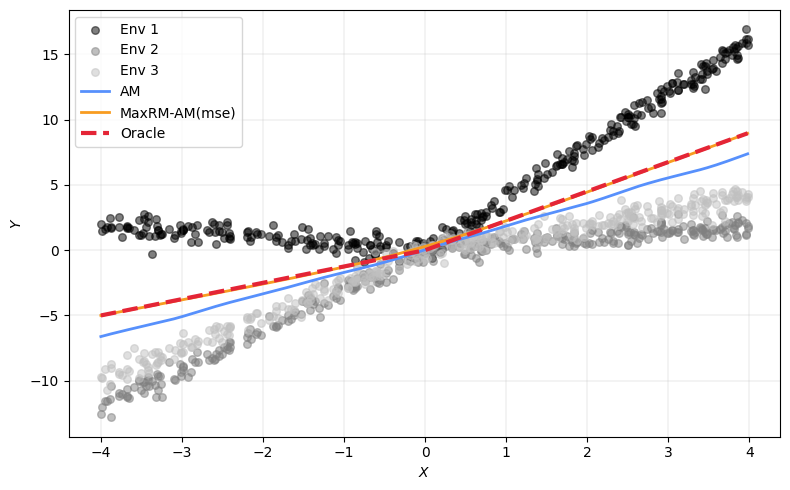

In [9]:
def plot_dtr_gam(
    dtr: pd.DataFrame,
    preds_erm: np.ndarray,
    preds_maxrm: np.ndarray,
    saveplot: bool = False,
    nameplot: str = "setting9_gam",
):
    data_colors = ["black", "grey", "silver"]
    environments = sorted(dtr["E"].unique())

    fig, ax = plt.subplots(figsize=(8, 5))
    for idx, env in enumerate(environments):
        marker_style = "o"
        ax.scatter(
            dtr[dtr["E"] == env]["X"],
            dtr[dtr["E"] == env]["Y"],
            color=data_colors[idx],
            marker=marker_style,
            alpha=0.5,
            s=30,
            label=f"Env {env + 1}",
        )

    ax.plot(dtr["X_sorted"], preds_erm, color=COLORS["blue"], linewidth=2, label="AM")
    ax.plot(
        dtr["X_sorted"],
        preds_maxrm,
        color=COLORS["orange"],
        linewidth=2,
        label=f"MaxRM-AM(mse)",
    )

    x_range = np.linspace(dtr["X_sorted"].min(), dtr["X_sorted"].max(), 1000)
    y_opt = np.where(x_range > 0, 2.25 * x_range, 1.25 * x_range)
    ax.plot(
        x_range,
        y_opt,
        color="#E42536",
        linewidth=3,
        label="Oracle",
        linestyle="--",
    )

    ax.set_xlabel("$X$")
    ax.set_ylabel("$Y$")
    ax.grid(True, linewidth=0.2)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, loc="upper left")

    plt.tight_layout()
    if saveplot:
        script_dir = os.getcwd()
        parent_dir = os.path.abspath(os.path.join(script_dir, ".."))
        plots_dir = os.path.join(parent_dir, "results", "figures")
        os.makedirs(plots_dir, exist_ok=True)
        outpath = os.path.join(plots_dir, f"{nameplot}.pdf")
        plt.savefig(outpath, dpi=300, bbox_inches="tight")
    plt.show()

dtr["X_sorted"] = Xtr_sorted
plot_dtr_gam(dtr, preds_gam, preds_maxrm_am, saveplot=True)